# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [16]:
display(cities[:5])

['hotan', 'cabo san lucas', 'bikenibeu village', 'ladario', 'adamstown']

In [22]:
# base_url = "https://api.openweathermap.org/data/2.5/weather?"
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
city = 'london'
limit = 5
api_key = weather_api_key

city_url = base_url + city + "&limit=" + str(limit) + "&appid=" + api_key

weather_response = requests.get(city_url).json()
print(json.dumps(weather_response, indent=4))

# # Parse the JSON and retrieve data
# city_weather = # YOUR CODE HERE

# # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
# city_lat = # YOUR CODE HERE
# city_lng = # YOUR CODE HERE
# city_max_temp = # YOUR CODE HERE
# city_humidity = # YOUR CODE HERE
# city_clouds = # YOUR CODE HERE
# city_wind = # YOUR CODE HERE
# city_country = # YOUR CODE HERE
# city_date = # YOUR CODE HERE

display(weather_response["weather"])
display(weather_response["coord"]["lat"])
display(weather_response["coord"]["lon"])


{
    "coord": {
        "lon": -0.1257,
        "lat": 51.5085
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 283.2,
        "feels_like": 282.66,
        "temp_min": 281.83,
        "temp_max": 284.69,
        "pressure": 1007,
        "humidity": 92,
        "sea_level": 1007,
        "grnd_level": 1004
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.91,
        "deg": 300,
        "gust": 10.6
    },
    "clouds": {
        "all": 74
    },
    "dt": 1697232624,
    "sys": {
        "type": 2,
        "id": 2006068,
        "country": "GB",
        "sunrise": 1697178008,
        "sunset": 1697217193
    },
    "timezone": 3600,
    "id": 2643743,
    "name": "London",
    "cod": 200
}


[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]

51.5085

-0.1257

In [20]:
# city_max_temp = # YOUR CODE HERE
# city_humidity = # YOUR CODE HERE
# city_clouds = # YOUR CODE HERE
# city_wind = # YOUR CODE HERE
# city_country = # YOUR CODE HERE
# city_date = # YOUR CODE HERE
display(weather_response["weather"])
display(weather_response["coord"]["lat"])
display(weather_response["coord"]["lon"])
display(weather_response["main"]["temp_max"])
display(weather_response["main"]["humidity"])
display(weather_response["wind"])
display(weather_response["sys"]["country"])
display(weather_response["dt"])

[{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}]

37.0997

79.9269

287.17

21

{'speed': 2, 'deg': 96, 'gust': 3.02}

'CN'

1697231254

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# "https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}"
#lat={lat}&lon={lon}&exclude={part}&appid={API key}
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hotan
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | bikenibeu village
Processing Record 4 of Set 1 | ladario
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | khuzdar
Processing Record 7 of Set 1 | castillos
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | terralba
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | fonte boa
Processing Record 12 of Set 1 | chinde
Processing Record 13 of Set 1 | caceres
Processing Record 14 of Set 1 | ghat
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | djibo
Processing Record 19 of Set 1 | vorkuta
Processing Record 20 of Set 1 | port hedland
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | cromer
Processing Recor

In [3]:
# # Set the API base URL
# url = 

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = # YOUR CODE HERE
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         city_weather = # YOUR CODE HERE

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = # YOUR CODE HERE
#         city_lng = # YOUR CODE HERE
#         city_max_temp = # YOUR CODE HERE
#         city_humidity = # YOUR CODE HERE
#         city_clouds = # YOUR CODE HERE
#         city_wind = # YOUR CODE HERE
#         city_country = # YOUR CODE HERE
#         city_date = # YOUR CODE HERE

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hotan,37.0997,79.9269,286.73,22,13,1.70,CN,1697233751
1,cabo san lucas,22.8909,-109.9124,306.27,66,2,5.23,MX,1697233751
2,bikenibeu village,1.3673,173.1241,303.13,74,40,2.06,KI,1697233751
3,ladario,-19.0047,-57.6017,303.20,42,0,2.06,BR,1697233752
4,adamstown,-25.0660,-130.1015,294.14,79,100,7.16,PN,1697233719


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../python_vacation_api/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hotan,37.0997,79.9269,286.73,22,13,1.70,CN,1697233751
1,cabo san lucas,22.8909,-109.9124,306.27,66,2,5.23,MX,1697233751
2,bikenibeu village,1.3673,173.1241,303.13,74,40,2.06,KI,1697233751
3,ladario,-19.0047,-57.6017,303.20,42,0,2.06,BR,1697233752
4,adamstown,-25.0660,-130.1015,294.14,79,100,7.16,PN,1697233719


In [44]:
# Convert to Celsius from Kelvin
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

display(city_data_df.head())

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hotan,37.0997,79.9269,13.58,22,13,1.70,CN,1697233751
1,cabo san lucas,22.8909,-109.9124,33.12,66,2,5.23,MX,1697233751
2,bikenibeu village,1.3673,173.1241,29.98,74,40,2.06,KI,1697233751
3,ladario,-19.0047,-57.6017,30.05,42,0,2.06,BR,1697233752
4,adamstown,-25.0660,-130.1015,20.99,79,100,7.16,PN,1697233719


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

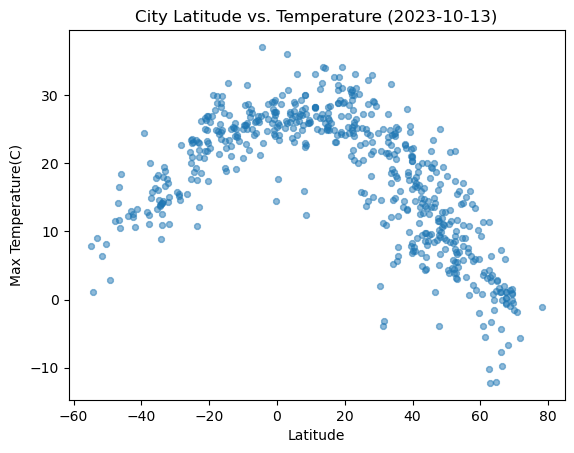

In [45]:
# Build scatter plot for latitude vs. temperature
ax = city_data_df.plot.scatter(x="Lat", y="Max Temp", alpha=.5, linewidths=1, marker="8")

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Temperature (2023-10-13)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature(C)")


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

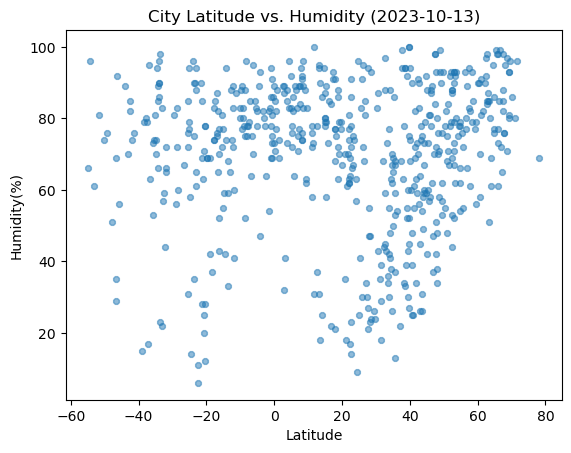

In [49]:
# Build the scatter plots for latitude vs. humidity
ax = city_data_df.plot.scatter(x="Lat", y="Humidity", alpha=.5, linewidths=1, marker="8")

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Humidity (2023-10-13)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%)")


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

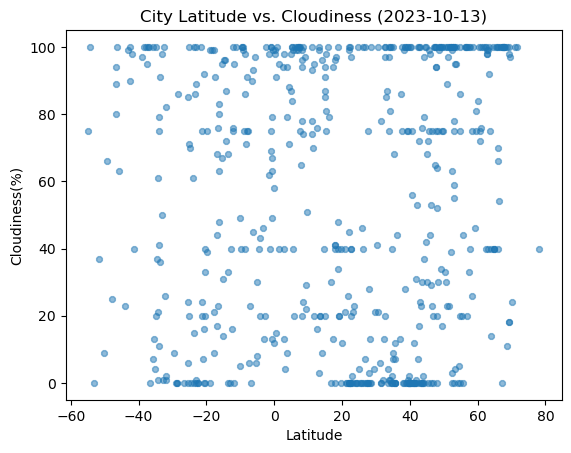

In [48]:
# Build the scatter plots for latitude vs. cloudiness
ax = city_data_df.plot.scatter(x="Lat", y="Cloudiness", alpha=.5, linewidths=1, marker="8")

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Cloudiness (2023-10-13)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

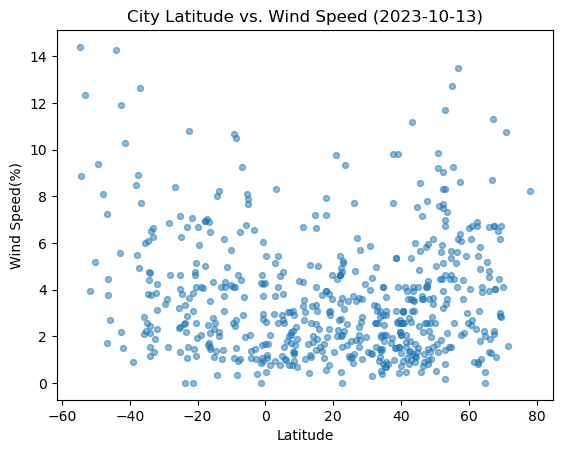

In [50]:
# Build the scatter plots for latitude vs. wind speed
ax = city_data_df.plot.scatter(x="Lat", y="Wind Speed", alpha=.5, linewidths=1, marker="8")

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Wind Speed (2023-10-13)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed(%)")


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
def regress_function(x, y, df, colx, coly, ylabel, title, xlabel="Latitude"):
    ax = df.plot.scatter(x=colx, y=coly, alpha=.5, linewidths=1, marker="8", legend=False)

    # Incorporate the other graph properties
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    corr, p = pearsonr(x_values, y_values)
    
    line, =ax.plot(x_values, regress_values, color="r")
    line.set_label(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
    ax.legend(loc="best")
    
    print(f"The r-value is {rvalue}")
    
    plt.show()


The r-value is -0.8341282524563041 and correlation is -0.8341282524563041


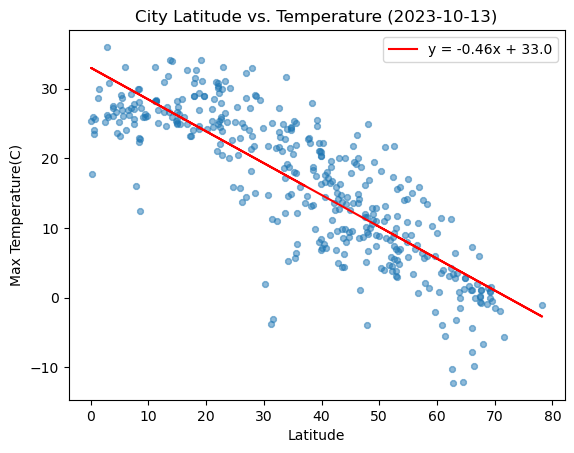

In [106]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
df = northern_hemi_df
colx = "Lat"
coly = "Max Temp"
ylabel = "Max Temperature(C)"
title = "City Latitude vs. Temperature (2023-10-13)"

regress_function(x, y, df, colx, coly, ylabel, title)

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
display(northern_hemi_df.head())
display(len(northern_hemi_df))

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hotan,37.0997,79.9269,13.58,22,13,1.70,CN,1697233751
1,cabo san lucas,22.8909,-109.9124,33.12,66,2,5.23,MX,1697233751
2,bikenibeu village,1.3673,173.1241,29.98,74,40,2.06,KI,1697233751
5,khuzdar,27.7384,66.6434,21.41,27,0,2.39,PK,1697233752
8,terralba,39.7192,8.6392,21.10,52,0,2.68,IT,1697233753


397

In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
display(southern_hemi_df.head())
display(len(southern_hemi_df))

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ladario,-19.0047,-57.6017,30.05,42,0,2.06,BR,1697233752
4,adamstown,-25.0660,-130.1015,20.99,79,100,7.16,PN,1697233719
6,castillos,-34.1667,-53.8333,8.94,66,1,2.43,UY,1697233725
7,port elizabeth,-33.9180,25.5701,14.16,96,75,1.54,ZA,1697233752
9,waitangi,-43.9535,-176.5597,12.27,89,23,14.26,NZ,1697233753


171

###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8341282524563041 and correlation is -0.8341282524563041


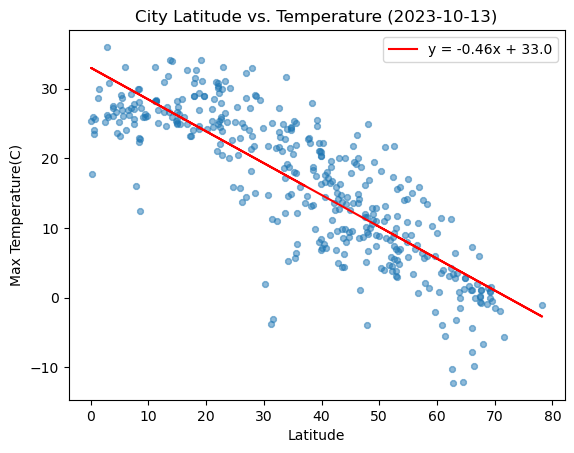

In [107]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
df = northern_hemi_df
colx = "Lat"
coly = "Max Temp"
ylabel = "Max Temperature(C)"
title = "City Latitude vs. Temperature (2023-10-13)"

regress_function(x, y, df, colx, coly, ylabel, title)

The r-value is: 0.7161472181434118


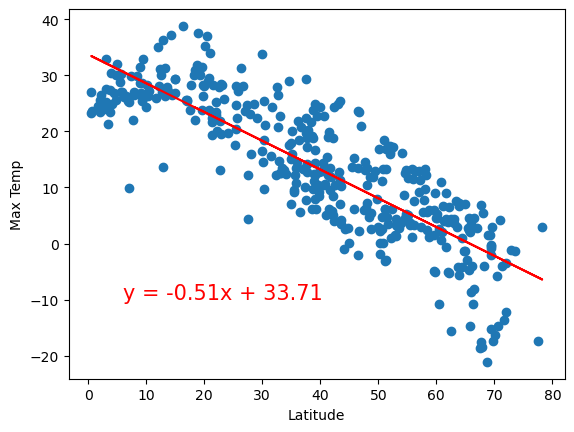

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


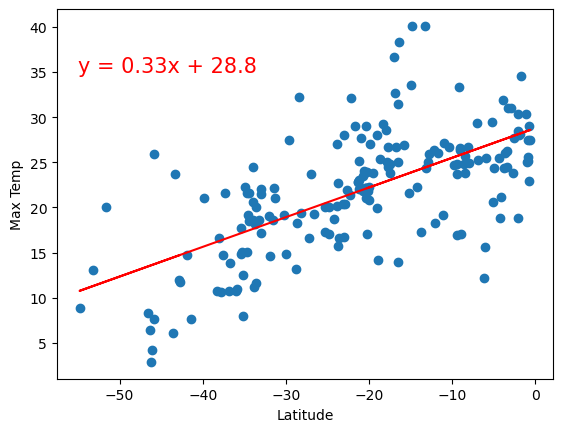

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


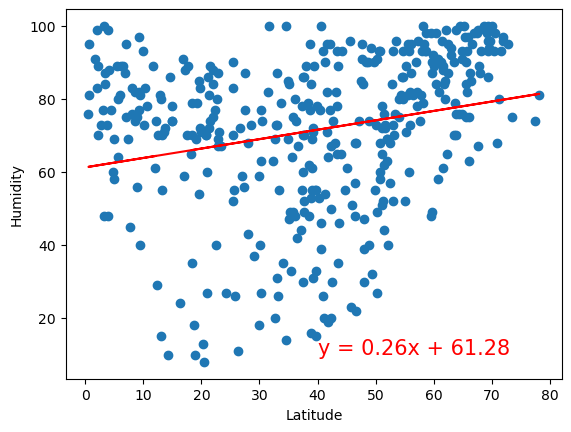

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


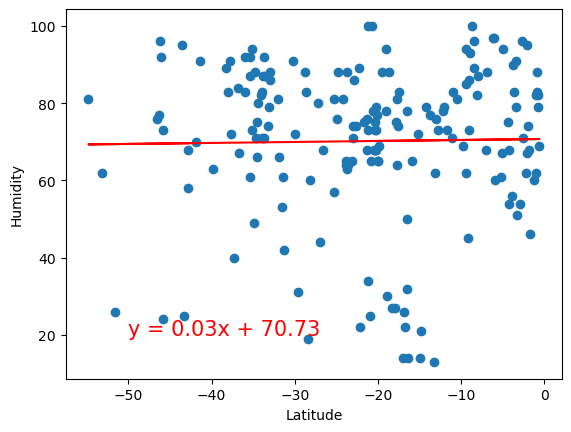

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


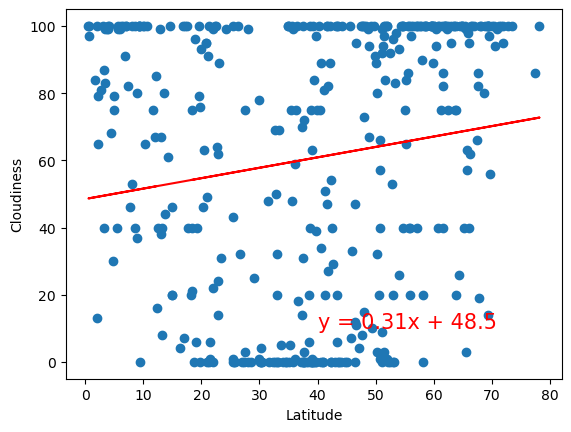

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


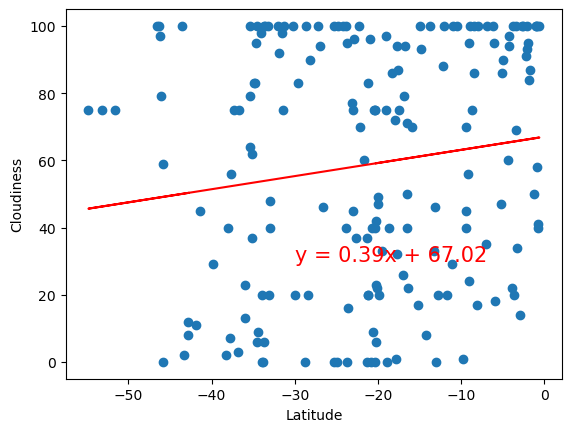

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


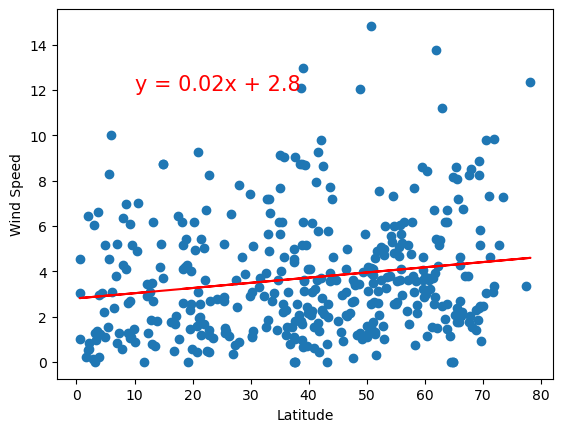

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


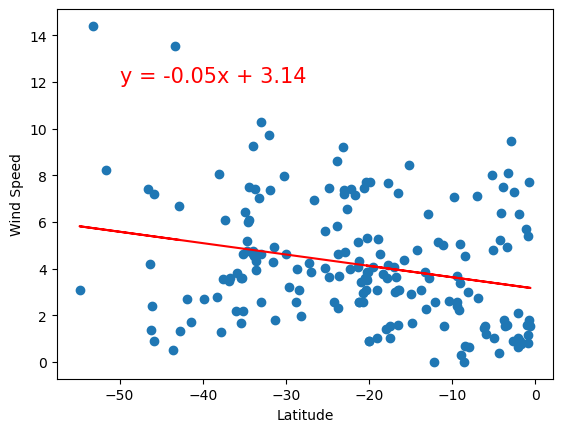

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE